IMPORT LIBRARIES

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

#  LOAD THE DATSET

In [183]:
df1=pd.read_csv('/content/train_LZdllcl.csv')
df2=pd.read_csv('/content/test_2umaH9m.csv')
sample=pd.read_csv('/content/sample_submission_M0L0uXE.csv')

TRAIN DATA DATA EXPLORATION

SHAPE

In [184]:
#TRAIN DATA SHAPE
df1.shape

(54808, 14)

In [185]:
df1.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [186]:
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


BASIC INFORMATION OF THE TRAINING DATA

In [187]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


STATISTICS SUMMARY OF TRAIN DATA

In [188]:
df1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [189]:
df1['employee_id'].nunique()

54808

DROP EMPLOYEE_-ID

In [190]:
df1.drop('employee_id',axis=1,inplace=True)


summary of categorical column

In [191]:
df1.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


MISSING VALUE DETECTION

In [192]:
df1.isnull().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


In [193]:
df1['education']=df1['education'].fillna(df1['education'].mode()[0])
df1['previous_year_rating']=df1['previous_year_rating'].fillna(df1['previous_year_rating'].median())

In [194]:
df1.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


DISTRIBUTION

In [195]:
cat_cols=['department','region','education','gender','recruitment_channel']#categorical columns
numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numerical_cols)


Numerical columns: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [196]:
continuous_cols = [col for col in numerical_cols if df1[col].nunique() > 10]
print("Continuous columns:", continuous_cols)

Continuous columns: ['age', 'length_of_service', 'avg_training_score']


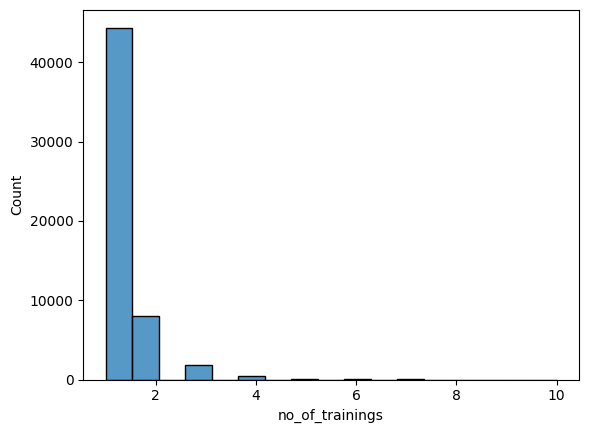

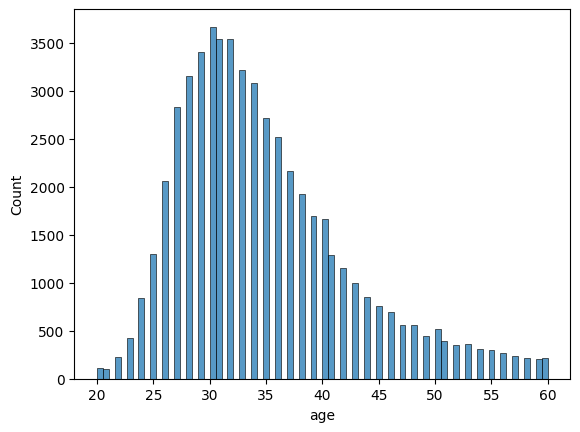

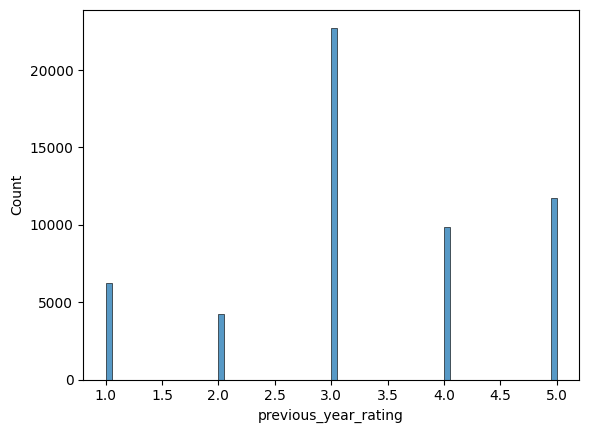

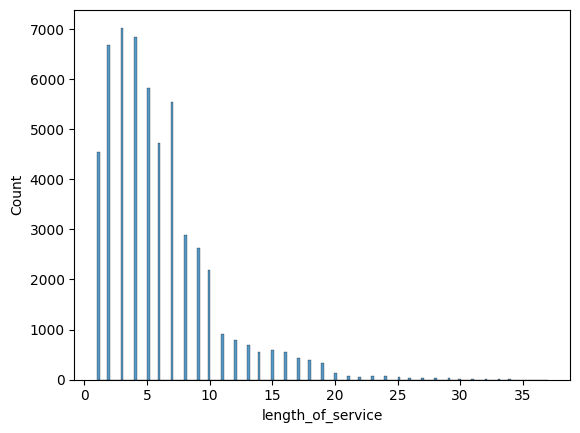

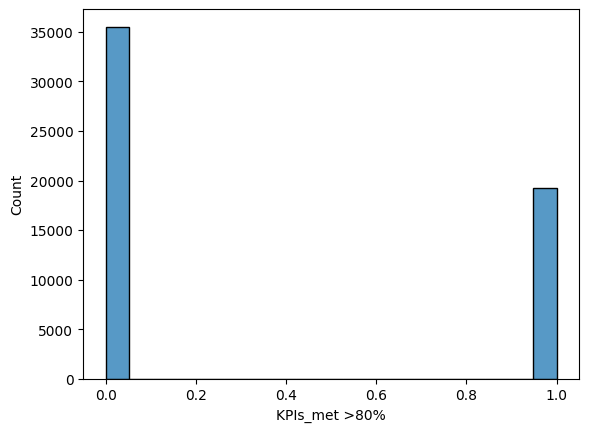

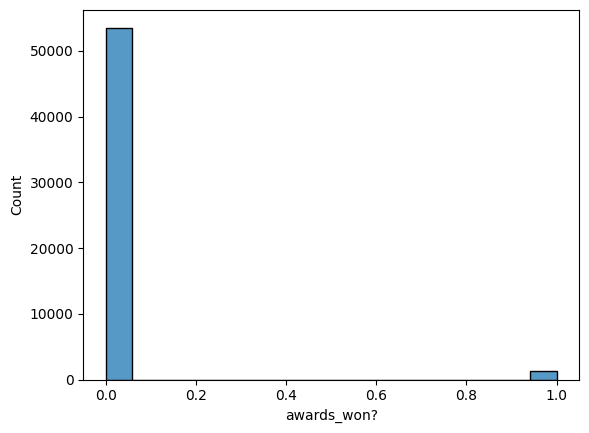

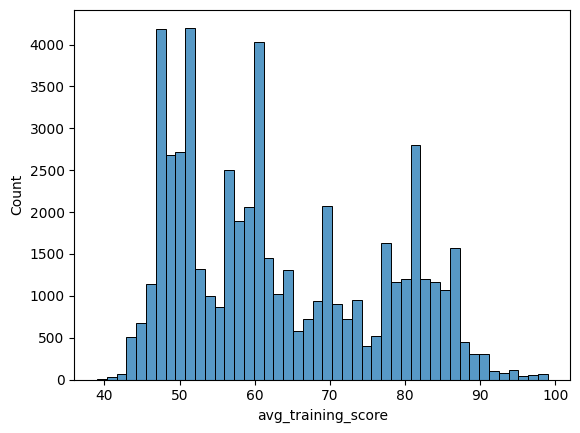

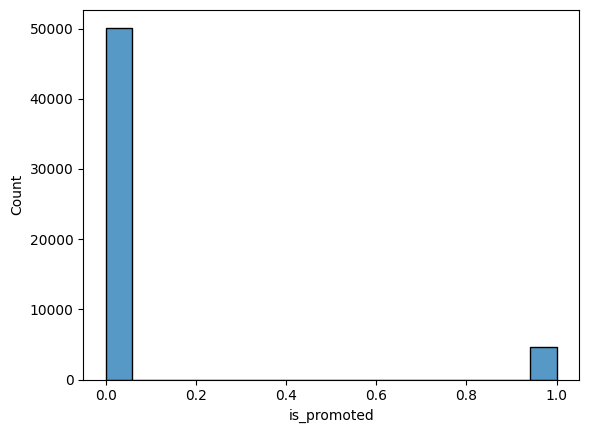

In [197]:
for col in numerical_cols:
  sns.histplot(df1[col])
  plt.show()

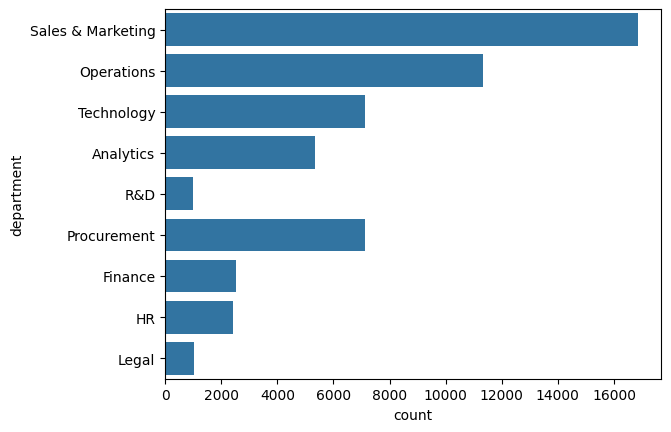

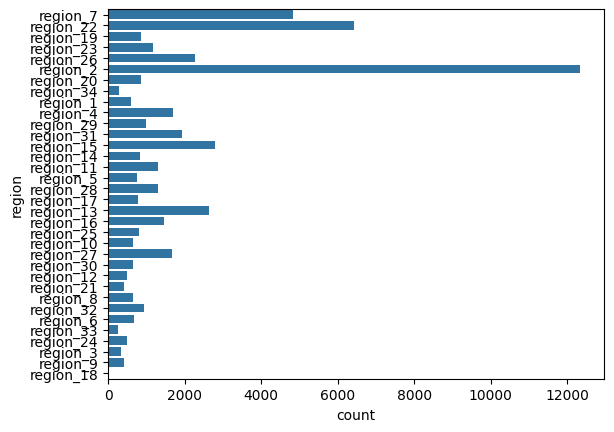

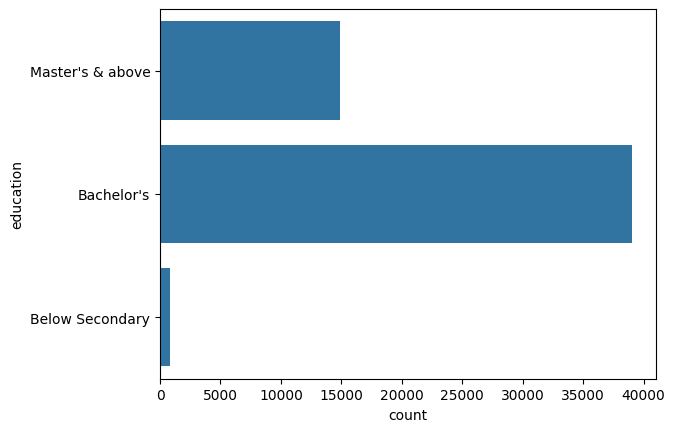

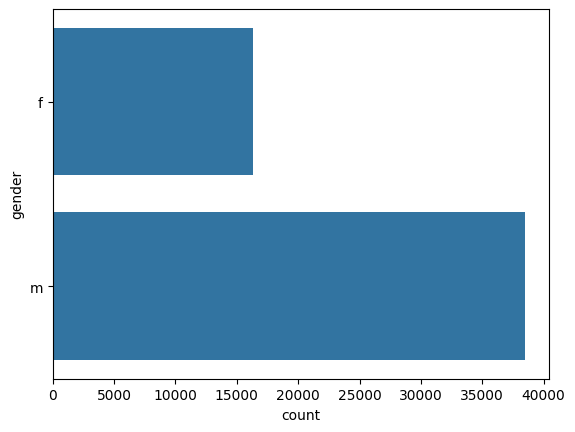

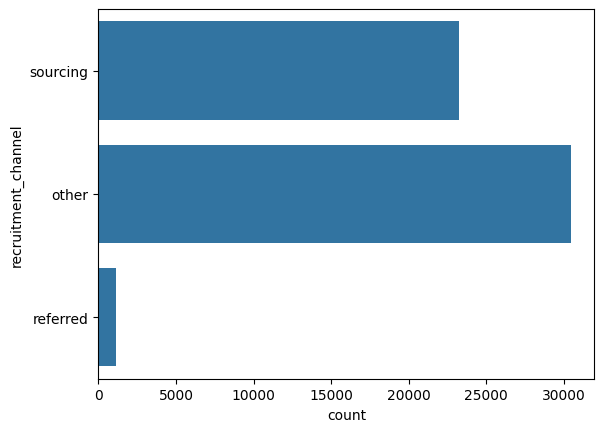

In [198]:
for col in cat_cols:
  sns.countplot(df1[col])
  plt.show()

BOX PLOT

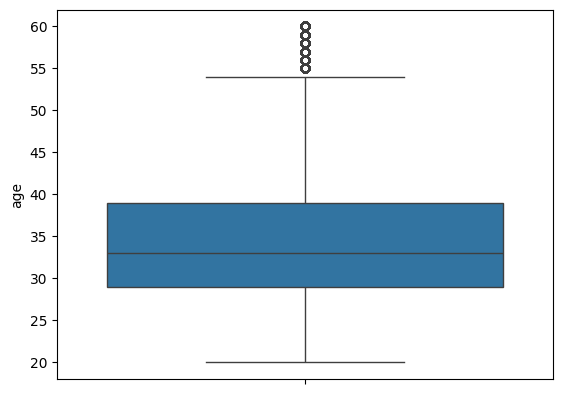

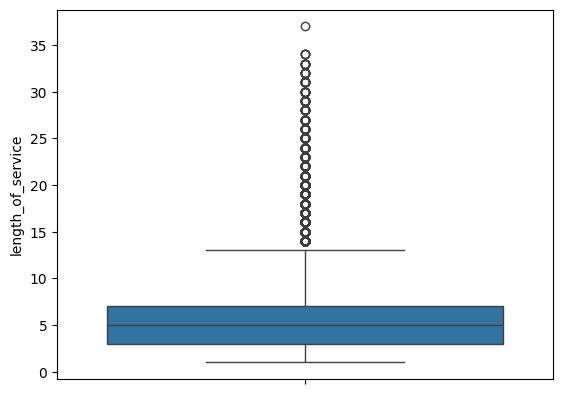

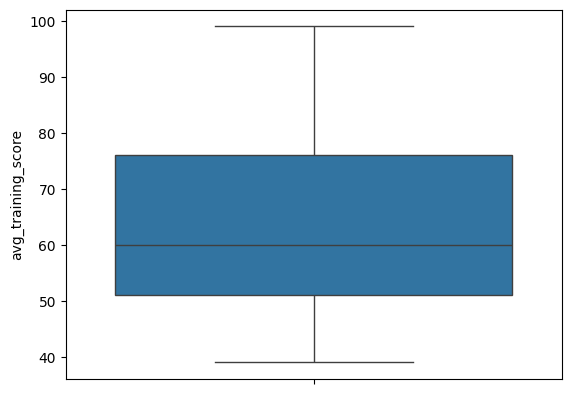

In [199]:
for col in continuous_cols:
  sns.boxplot(df1[col])
  plt.show()

  CORRELATION MATRIX AND HEATMAP

In [200]:
corr_matrix=df1[numerical_cols].corr()

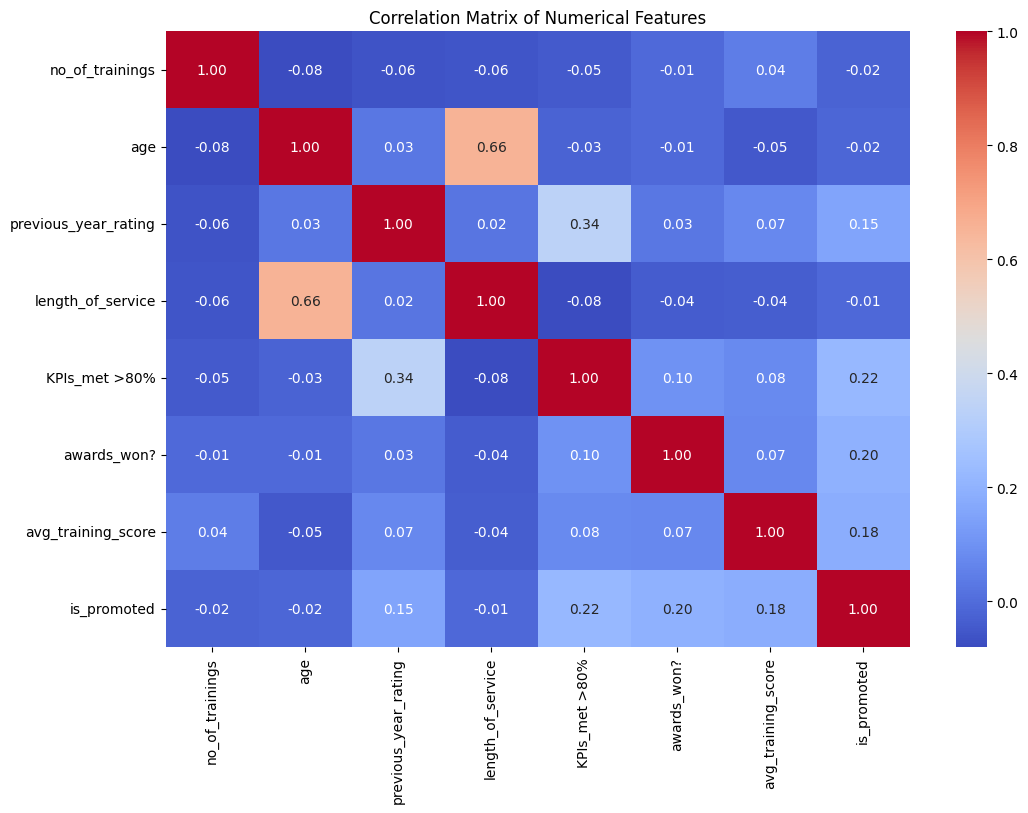

In [201]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


ENCODING THE CATEGORICAL COLUMN

In [202]:
  cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [203]:
df1['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [204]:
#here education has order so encode education with ordinal encoder and other columns with one hot
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

edu_order = [['Below Secondary', "Bachelor's", "Master's & above"]]
encoder = OrdinalEncoder(categories=edu_order)
df1['education'] = encoder.fit_transform(df1[['education']])


In [205]:
df1['education'].head()

,education
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [207]:
cat_cols1=['department', 'region', 'gender', 'recruitment_channel']

In [208]:
#one hot encode cat columns
df1=pd.get_dummies(df1,columns=cat_cols1,dtype='int32')

In [209]:
df1

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2.0,1,35,5.0,8,1,0,49,0,0,...,0,0,1,0,0,1,0,0,0,1
1,1.0,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1.0,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1.0,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.0,1,48,3.0,17,0,0,78,0,0,...,0,0,0,0,0,0,1,0,0,1
54804,2.0,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,0,1,0,1,0,0
54805,1.0,1,27,5.0,3,1,0,79,0,1,...,0,0,0,0,0,0,1,1,0,0
54806,1.0,1,29,1.0,2,0,0,45,0,0,...,0,0,0,0,1,0,1,0,0,1


STANDARDISATION

In [210]:
x=df1.drop('is_promoted',axis=1)
y=df1['is_promoted']

In [211]:
x.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'reg

In [212]:
numerical_cols

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

Apply scaling to numerical columns

In [213]:
numerical_features=['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score']

In [214]:
scaler=StandardScaler()
x[numerical_features]=scaler.fit_transform(x[numerical_features])


In [215]:
x[numerical_features].head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,-0.415276,0.025598,1.395766,0.500460,-0.154018,-1.075931
1,-0.415276,-0.627135,1.395766,-0.437395,-0.154018,-0.253282
2,-0.415276,-0.104948,-0.250651,0.265996,-0.154018,-1.001145
3,1.226063,0.547785,-1.897069,0.969387,-0.154018,-1.001145
4,-0.415276,1.331064,-0.250651,-0.906322,-0.154018,0.718939


In [216]:
x.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2.0,-0.415276,0.025598,1.395766,0.500460,1,-0.154018,-1.075931,0,0,...,0,0,1,0,0,1,0,0,0,1
1,1.0,-0.415276,-0.627135,1.395766,-0.437395,0,-0.154018,-0.253282,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1.0,-0.415276,-0.104948,-0.250651,0.265996,0,-0.154018,-1.001145,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,1.226063,0.547785,-1.897069,0.969387,0,-0.154018,-1.001145,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1.0,-0.415276,1.331064,-0.250651,-0.906322,0,-0.154018,0.718939,0,0,...,0,0,0,0,0,0,1,1,0,0


TARGET column is 'is_promoted'

In [217]:
df1['is_promoted'].value_counts(normalize=True)

,proportion
is_promoted,
0,0.91483
1,0.08517


  TARGET COLUMN IS VERY MUCH IMBALANCED .WE NEED TO OVER SAMPLE THIS TARGET.TO MAKE THE PROPORTION OF EACH LABEL EQUAL INORDER TO GET UNBIASED RESULT.

BEFORE DOING SMOTE WE NEED TO DO SPLIT THE DATA INTO LABELS AND FEATURES.

In [218]:
# Step 2: Apply SMOTE only on the training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)


In [219]:
y.value_counts(normalize=True)

,proportion
is_promoted,
0,0.5
1,0.5


IMBALANCE IS REMOVED.

# TEST DATA PREPROCESSING

In [220]:
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [221]:
df2.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [222]:
df2['education']=df2['education'].fillna(df2['education'].mode()[0])
df2['previous_year_rating']=df2['previous_year_rating'].fillna(df2['previous_year_rating'].median())

In [223]:
df2.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [224]:
df2.drop('employee_id',axis=1,inplace=True)

ENCODE CATEGORICAL COLUMNS

In [225]:
#ordinal encode education
df2['education'] = encoder.transform(df2[['education']])

In [226]:
#one hot encode cat columns
df2=pd.get_dummies(df2,columns=cat_cols1,dtype='int32')

In [227]:
df2.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,1,24,3.0,1,1,0,77,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,1,31,3.0,5,0,0,51,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1.0,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,3,31,2.0,9,0,0,65,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1.0,1,30,4.0,7,0,0,61,0,1,...,0,0,0,0,0,0,1,0,0,1


SCALE TEST DATA

In [228]:
df2[numerical_features]=scaler.transform(df2[numerical_features])

In [229]:
df2.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,-0.415276,-1.410415,-0.250651,-1.140785,1,-0.154018,1.018084,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,-0.415276,-0.496588,-0.250651,-0.202931,0,-0.154018,-0.926359,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1.0,-0.415276,-0.496588,-1.897069,-0.437395,0,-0.154018,-1.225504,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,2.867403,-0.496588,-1.073860,0.734923,0,-0.154018,0.120649,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1.0,-0.415276,-0.627135,0.572557,0.265996,0,-0.154018,-0.178496,0,1,...,0,0,0,0,0,0,1,0,0,1


In [233]:
#df2 columns and x.columns are equal or not
print(x.columns.equals(df2.columns))

True


In [234]:
x_test=df2

# RANDOM FOREST CLASSIFIER

In [235]:
x.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'reg

In [236]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Fit the model to the training data
rf_model.fit(x, y)

RandomForestClassifier(max_depth=10, random_state=42)

In [242]:
yrf_train=rf_model.predict(x)#predict with the train data

In [243]:
f1_score(y,yrf_train)

0.8315341777781896

In [244]:
y_rf=rf_model.predict(x_test)

# LOGISTIC REGRESSION

In [245]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
y_lr_train=lr_model.predict(x)

In [247]:
f1_score(y,y_lr_train)

0.8561699865025154

In [248]:
y_lr=lr_model.predict(x_test)

DECISION TREE

In [249]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x,y)

DecisionTreeClassifier(random_state=42)

In [250]:
y_dt_train=dt_model.predict(x)

In [251]:
f1_score(y,y_dt_train)

0.999860371412044

XG BOOST

In [252]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(random_state=42)
xgb_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [253]:
y_xgb_train=xgb_model.predict(x)

In [254]:
f1_score(y,y_xgb_train)


0.9617019541483603

NAIVE BAYES MODEL

In [255]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x,y)

GaussianNB()

In [256]:
y_nb_train=nb_model.predict(x)

In [257]:
f1_score(y,y_nb_train)

0.7263566195196489

AMONG THE MODELS TRIED I GOT BEST ACCURACY ON DECISION TREE

FINE TUNING DECISION TREE

In [261]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Use F1-score as the evaluation metric
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(x, y)

# Print the best parameters and the best F1-score
print("Best parameters found: ", random_search.best_params_)
print("Best F1-score found: ", random_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters found:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Best F1-score found:  0.9292742246153628


In [260]:

# Get the best model
best_dt_model = random_search.best_estimator_

# Evaluate the best model on the training data
y_best_dt_train = best_dt_model.predict(x)
print("F1-score on training data with best parameters: ", f1_score(y, y_best_dt_train))

# Make predictions on the test data using the best model
y_best_dt = best_dt_model.predict(x_test)


F1-score on training data with best parameters:  0.999860371412044


In [268]:
y_best_dt.shape

(23490,)

In [266]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [267]:
sample.shape

(23490, 2)

In [270]:
sample['is_promoted']=y_best_dt

In [271]:
#convert to csv
sample.to_csv('submissionfinal2.csv',index=False)

In [272]:
#download csv
from google.colab import files
files.download('submissionfinal2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>